# Two Tasks
1. Sentiment Analyze an Account's AVERAGE FOLLOWER MOOD
2. Sentiment Analyze an Account's mood

**Combine these together into 1 User database/dataframe**

In [74]:
from Cookbook import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
userList = ['EckhartTolle', 'JulienHimself', 'Headspace', 'realDonaldTrump']

In [40]:
d = {
    'user': [],
    'mood': [],
    'follower_mood': []
}

#df = pd.DataFrame.from_dict(d, orient='index').T

In [36]:
tweetss = twitter_api.get_user(screen_name='EckhartTolle').timeline(count=100)
len(tweetss)

100

In [41]:
np.mean(list(map(lambda x: TextBlob(x).sentiment[0], [t.text for t in tweetss])))

0.13185842074592075

In [42]:
for user in userList:
    f_tweets = get_follower_tweets(user, 10)['tweet'].values
    tweets = twitter_api.get_user(screen_name=user).timeline(count=100)
    tweets = [t.text for t in tweets]

    #mood = classify_sentiment(f_tweets[:6])
    #follower_mood = classify_sentiment(tweets[:6])
    mood = np.mean(list(map(lambda x: TextBlob(x).sentiment[0], tweets)))
    follower_mood = np.mean(list(map(lambda x: TextBlob(x).sentiment[0], f_tweets)))

    d['user'].append(user)
    d['mood'].append(mood)
    d['follower_mood'].append(follower_mood)

Rate limit reached. Sleeping for: 407


In [44]:
df = pd.DataFrame.from_dict(d)

In [45]:
df

,user,mood,follower_mood
0,EckhartTolle,0.131858,0.124268
1,JulienHimself,0.195880,0.098589
2,Headspace,0.166107,0.315158
3,realDonaldTrump,0.092770,0.012059


In [70]:
def create_tag(user):
    if user == 'realDonaldTrump': return 'Politician'
    else:
        return 'Spirituality'

In [71]:
df['tags'] = df['user'].apply(lambda x: create_tag(x))

In [75]:
df

,user,mood,follower_mood,tags
0,EckhartTolle,0.131858,0.124268,Spirituality
1,JulienHimself,0.195880,0.098589,Spirituality
2,Headspace,0.166107,0.315158,Spirituality
3,realDonaldTrump,0.092770,0.012059,Politician


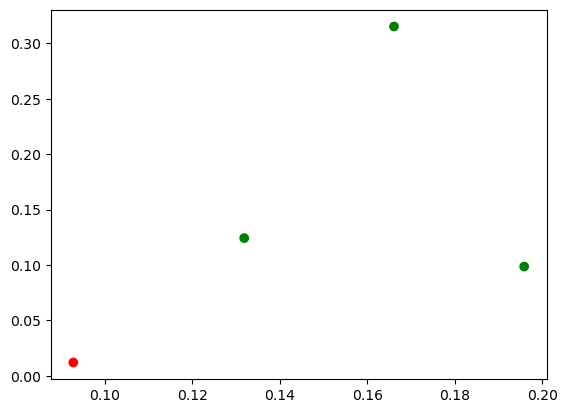

In [79]:
colorings = {
    "Spirituality": 'Green',
    "Politician": 'Red'
}

plt.scatter(df['mood'], df['follower_mood'], color=[colorings[tag] for tag in df['tags']])